In [ ]:
#Defining the model 
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, Nadam, RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling2D
#fitting the model and predicting 
from keras.utils import to_categorical

import numpy as np # linear algebra
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random

In [ ]:
(train_images, y_train), (test_images, y_test) = mnist.load_data()

In [ ]:
x_train = train_images#[0:10000,:]
x_test = test_images#[0:1000,:]

y_train = y_train#[0:10000]
y_test = y_test#[0:1000]

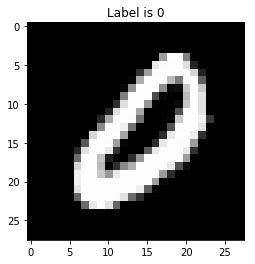

In [4]:
n = random.randint(0, x_train.shape[0]-1)
plt.title('Label is {label}'.format(label=y_train[n]))
plt.imshow(train_images[n], cmap='gray')
plt.show()

In [5]:
#train_images = train_images.reshape(train_images.shape[0],28,28,1)
x_train.shape

(60000, 28, 28)

In [16]:
Conv1D(32, (3), activation='sigmoid', input_shape=(28, 28))

In [18]:
#sigmoid, tanh, softmax, relu, Leaky ReLU

model = Sequential()
#model.add(Dense(28, activation='sigmoid', input_shape=(28, 28)))
model.add(Conv1D(16, (7), activation='sigmoid', input_shape=(28, 28)))
#model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))

model.add(Flatten())
#model.add(Dense(512, activation='sigmoid'))
#model.add(Dropout(0.15))
#model.add(Dense(int(416/4), activation='sigmoid'))
#model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#sgd = SGD(lr=0.01)
#adam = Adam(lr=0.01)
#adagrad = Adagrad(lr=0.01)
#adadelta = Adadelta(lr=0.01)
rmsprop = RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 22, 16)            3152      
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 16)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 352)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3530      
Total params: 6,682
Trainable params: 6,682
Non-trainable params: 0
_________________________________________________________________


In [21]:
def aprender(x_train, y_train):
    model.fit(x_train,to_categorical(y_train),epochs=1,validation_split=0.05,batch_size=64)

In [22]:
aprender(x_train, y_train)

Train on 57000 samples, validate on 3000 samples
Epoch 1/1
57000/57000 [==============================] - 448s 8ms/step - loss: 0.2727 - acc: 0.9176 - val_loss: 0.1465 - val_acc: 0.9607


In [10]:
y_pred = model.predict(x_test)
y_pred[0]

array([1.9979690e-10, 2.6023423e-09, 5.8664053e-05, 5.2153436e-04,
       2.1806608e-08, 3.9069646e-06, 4.8311209e-11, 9.9938738e-01,
       3.2992642e-09, 2.8481394e-05], dtype=float32)

In [11]:
y_test_class = y_test #np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Prediccion: 9


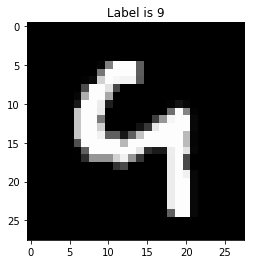

In [12]:
#x_test.shape
n = random.randint(1, y_test_class.shape[0]) - 1
y_pred = model.predict(x_test[n:n+1])
print("Prediccion: {}".format(np.argmax(y_pred,axis=1)[0]))
plt.title('Label is {label}'.format(label=y_test[n]))
plt.imshow(test_images[n], cmap='gray')
plt.show()

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.97      0.99      0.98      1135
          2       0.95      0.95      0.95      1032
          3       0.94      0.94      0.94      1010
          4       0.97      0.94      0.96       982
          5       0.93      0.94      0.93       892
          6       0.96      0.97      0.97       958
          7       0.98      0.89      0.94      1028
          8       0.94      0.94      0.94       974
          9       0.89      0.95      0.92      1009

avg / total       0.95      0.95      0.95     10000

[[ 966    0    1    0    0    3    6    0    3    1]
 [   0 1119    4    1    0    1    2    0    8    0]
 [   3    2  978   10    3    6    6    7   14    3]
 [   1    0   15  952    1   22    1    5    8    5]
 [   1    2    0    1  927    0    7    0    4   40]
 [   4    3    2   26    1  837    8    1    5    5]
 [   6    3    1    0    3   11  931    0  